# Simple linear regression
## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## Load data

In [2]:
data = pd.read_csv('./simple-linear-regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
x = data['SAT']
y = data['GPA']
print(x.shape)
print(y.shape)

(84,)
(84,)


In [6]:
x_matrix = x.values.reshape(-1, 1)
print(x_matrix.shape)

(84, 1)


## Regression

In [7]:
reg = LinearRegression()
reg.fit(x_matrix, y)

LinearRegression()

## Stats
### R-squared

In [8]:
reg.score(x_matrix, y)

0.40600391479679765

### Coeffients

In [9]:
reg.coef_

array([0.00165569])

### Intercept


In [10]:
reg.intercept_

0.2750402996602803

## Predictions

In [12]:
new_data = pd.DataFrame(data=[1740, 1760], columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [13]:
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [14]:
new_data['Predicted GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted GPA
0,1740,3.155938
1,1760,3.189051


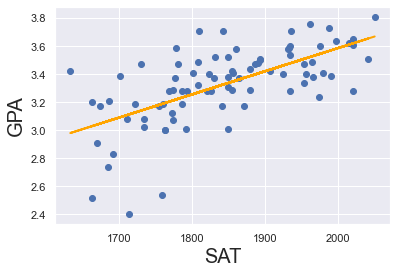

In [16]:
plt.scatter(x, y)

yhat = reg.coef_*x_matrix + reg.intercept_
fig = plt.plot(x, yhat, lw=2, c='orange', label='regression line')

plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

# Multiple linear regression
## Load data

In [17]:
data = pd.read_csv('./multiple-linear-regression.csv')
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [19]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


## Regression

In [20]:
x = data[['SAT', 'Rand 1,2,3']]
y = data['GPA']

reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

## Stats
### Coefficients

In [21]:
reg.coef_

array([ 0.00165354, -0.00826982])

### Intercept

In [22]:
reg.intercept_

0.29603261264909486

### R-squared

In [23]:
reg.score(x, y)

0.40668119528142843

### Formula for Adjusted $R^2$
$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [28]:
print(x.shape, end=' (n, p)')

(84, 2) (n, p)

In [26]:
r2 = reg.score(x, y)

n = x.shape[0]
p = x.shape[1]

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adj_r2

0.39203134825134023

## p-value ~ sklearn Feature selection
### F-regression foreach independent variable

In [29]:
from sklearn.feature_selection import f_regression

print(f_regression(x, y), end=' (F-statistics, p-values)')

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01])) (F-statistics, p-values)

In [30]:
p_values = f_regression(x, y)[1]
p_values.round(3)

array([0.   , 0.676])

- These are the univariate p-values reached from simple linear models.
- They do not reflect the interconnection of the features in our multiple linear regression.
## Summary

In [31]:
reg_summary = pd.DataFrame(data=x.columns.values, columns=['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [32]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


- p-values are one of the best ways to determine if a variable is redundant, but they provide no information whasover about HOW USEFUL a variable is
# Standardization

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [36]:
x_scaled = scaler.transform(x)
x_scaled

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

## Regression with scaled features

In [37]:
reg = LinearRegression()
reg.fit(x_scaled, y)

LinearRegression()

### Coefficient

In [38]:
reg.coef_

array([ 0.17181389, -0.00703007])

### Intercept

In [39]:
reg.intercept_

3.330238095238095

## Summary

In [43]:
reg_summary = pd.DataFrame([['Bias'], ['SAT'], ['Rand 1,2,3']], columns=['Features'])
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1]
# Weights ~ ML word for Coefficients
# Bias ~ ML word for Intercept
reg_summary

,Features,Weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


- In ML doesnt need $R^2$, we can evaluate the Weights
## Predictions

In [44]:
new_data = pd.DataFrame(data=[[1700, 2], [1800, 1]], columns=['SAT', 'Rand 1,2,3'])
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [45]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-1.39811928, -0.07002087],
       [-0.43571643, -1.24637147]])

In [46]:
reg.predict(new_data_scaled)

array([3.09051403, 3.26413803])

### Remove the 'Rand 1,2,3' variable

In [48]:
reg_simple = LinearRegression()

x_simple_matrix = x_scaled[:, 0].reshape(-1, 1)
reg_simple.fit(x_simple_matrix, y)

LinearRegression()

In [49]:
reg_simple.predict(new_data_scaled[:, 0].reshape(-1, 1))

array([3.08970998, 3.25527879])